# [第6回 OSS によるテキストマイニング](https://www.ogis-ri.co.jp/otc/hiroba/technical/similar-document-search/part6.html)

## 3. 分析環境のセットアップ

In [ ]:
!pip install ginza

     |████████████████████████████████| 10.4MB 9.3MB/s 
     |████████████████████████████████| 51.5MB 69kB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 1.1MB 32.5MB/s 
     |████████████████████████████████| 481kB 37.9MB/s 
  Created wheel for ginza: filename=ginza-4.0.6-cp37-none-any.whl size=15793 sha256=45d087aecdb041d285e6e68a0976bfc8c1dce61fdc3c58661721742d83c5c67b
  Stored in directory: /root/.cache/pip/wheels/7e/37/14/80b8f727f6adb2b00377bca3ddf9d9a999aecff97ee0a3017c
  Created wheel for ja-ginza: filename=ja_ginza-4.0.0-cp37-none-any.whl size=51530814 sha256=c918b0d0d275223ee6fcf25981c3b69b67d6930710c4b4336d84cbc31107c54f
  Stored in directory: /root/.cache/pip/wheels/28/5a/c0/95ac590b39eff99c77d729f284341d15a6903e4011d70ff421
  Created wheel for SudachiPy: filename=SudachiPy-0.5.2-cp37-cp37m-linux_x86_64.whl size=870169 sha256=e66cee3ca59f9a8ee81c1b52bf36f41be4c3f91176ab030b374469b343947148
  Stored in directory: /root/.cach

In [ ]:
import pkg_resources, imp
imp.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

In [ ]:
!pip install wordcloud

In [ ]:
!pip install scattertext jieba empath astropy gensim umap-learn

     |████████████████████████████████| 7.3MB 6.6MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 1.2MB 37.6MB/s 
  Created wheel for empath: filename=empath-0.89-cp37-none-any.whl size=57823 sha256=afd9ca81f33a36cb89f16e4285282ece1d70042b7168a066a9f1a349ca1f6896
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=2e09f05f9be7e9886c5a7cbdfdf5fc2cd7d1231d7334854d2b01d2adf861a97d
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=4132588b1d144b5b2635e85d0da9b84172427f0912998179f5b02950e96a8b2c
  Stored in directory: /root/.cache/pip/wheels/37/db/d7/fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3

In [ ]:
!apt install fonts-takao-pgothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-takao-pgothic
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 3,400 kB of archives.
After this operation, 6,284 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-takao-pgothic all 00303.01-2ubuntu1 [3,400 kB]
Fetched 3,400 kB in 1s (2,394 kB/s)
Selecting previously unselected package fonts-takao-pgothic.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-takao-pgothic_00303.01-2ubuntu1_all.deb ...
Unpacking fonts-takao-pgothic (00303.01-2ubuntu1) ...
Setting up fonts-takao-pgothic (00303.01-2ubuntu1) ...
update-alternatives: using /usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf to provide /usr/share/fonts/truetype/fonts-japanese-gothic.ttf (fonts-japanese-gothic.ttf) in auto mode
Processing tri

## 4. データセットのロード

In [ ]:
!curl -O https://www.rondhuit.com/download/ldcc-20140209.tar.gz
!tar zxf ldcc-20140209.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8647k  100 8647k    0     0  5039k      0  0:00:01  0:00:01 --:--:-- 5036k


In [ ]:
import os
import numpy as np

LDCC_DIR = "./text"
groups = [f for f in os.listdir(LDCC_DIR) if os.path.isdir(LDCC_DIR + "/" + f)]

file_names = {}
for group in groups:
    files = os.listdir(LDCC_DIR + "/" + group)
    file_names[group] = files

texts  = []
labels = []

for group in file_names.keys():
    for file_name in file_names[group]:
        with open(os.path.join(LDCC_DIR, group, file_name), 'r') as f:
          lines = f.readlines()
          text = "".join(lines[3:])
        texts.append(text) 
        labels.append(group)
labels = np.array(labels) 


In [ ]:
import spacy
nlp = spacy.load('ja_ginza')
docs = list(nlp.pipe(texts, disable=['ner']))


## 5. 前準備

In [ ]:
for doc in docs:
  with doc.retokenize() as retokenizer:
    for noun_chunk in doc.noun_chunks:
      retokenizer.merge(noun_chunk)  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
NGRAM=1
MAX_DF=0.95
MIN_DF=0.03
NUM_VOCAB=1000


In [ ]:
from spacy.lang.ja.stop_words import STOP_WORDS

In [ ]:
import ginza
#stop_words = list(ginza.STOP_WORDS)
stop_words = list(STOP_WORDS)
stop_words.extend(['max', 'エスマックス', 'smaxjp'])


In [ ]:
def soften(word):
  replace_table = {
      '為る': 'する', '成る': 'なる', '遣る': 'やる', '有る': 'ある', '無い': 'ない',
      '御洒落': 'おしゃれ', '撫子': 'なでしこ', '未だ未だ': 'まだまだ', '迚も': 'とても',
      '唯': 'ただ', '筈': 'はず', '若し': 'もし'
  }
  return replace_table.get(word, word)


## 6. 単語頻度

In [ ]:
POS_NOUN = ['PROPN', 'NOUN'] # 固有名詞と名詞
tokens = []
for doc in docs:
    tokens.append(" ".join([token.lemma_ for token in doc if token.pos_ in POS_NOUN or len(POS_NOUN) ==0]))
cv = CountVectorizer(stop_words=stop_words, ngram_range=(1,NGRAM), max_df=MAX_DF, min_df=MIN_DF, max_features=NUM_VOCAB)
X_bow = cv.fit_transform(tokens).toarray()
print("Shape of X : %s" % (X_bow.shape,))
# Shape of X : (7376, 448)


Shape of X : (7376, 276)


In [ ]:
vocab  = cv.vocabulary_ 
print("Num of vocab : %s" % (len(vocab)))
print("Sample of vocab : %s" % (list(vocab.keys())[:3]))
# Num of vocab : 448
# Sample of vocab : ['紹介', 'グーグル', 'トップ']


Num of vocab : 276
Sample of vocab : ['家族', 'iphone', 'ネット']


In [ ]:
TOP_K = 20
sum_all = np.sum(X_bow, axis=0)
indices_topk = np.argsort(sum_all)[::-1][:TOP_K]
X_bow_topk = np.take(X_bow, indices_topk, axis=1)
print("Shape of X_bow_topk : %s" % (X_bow_topk.shape,))
# Shape of X_bow_topk : (7376, 20)

reverse_vocab = {vocab[k]:k for k in vocab.keys() }
words = [reverse_vocab[i] for i in indices_topk]


Shape of X_bow_topk : (7376, 20)


In [ ]:
group_wordcount = {}
for group in groups:
    indices = np.where(labels == group)[0]
    X_group = np.take(X_bow_topk, indices, axis=0)
    sum_group = np.sum(X_group, axis=0) 
    group_wordcount[group] = sum_group


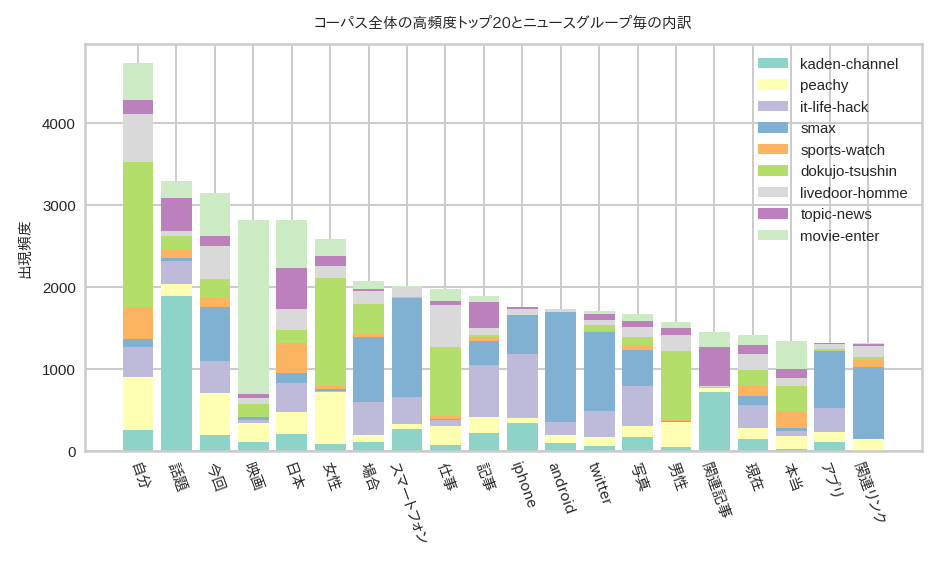

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties
%matplotlib inline
plt.style.use('seaborn-whitegrid')

def plot_word_dist(words, group_wordcount, title, color="darkcyan"):
    left = np.array(list(range(len(words))))
    f, ax = plt.subplots(figsize=(6,3), dpi=180)
    fp = FontProperties(fname='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf', size=6)
    bottom = np.zeros(len(words))
    cmap = cm.get_cmap('Set3')
    for i, group in enumerate(group_wordcount.keys()):
        vector = group_wordcount[group]
        color=1/len(groups) * i
        plt.bar(left, vector, label=group, bottom=bottom, color=cmap(color))
        bottom += vector
    ax.legend(loc='upper right')
    plt.xticks(left, words, rotation=290,  fontproperties=fp)
    plt.ylabel("出現頻度", fontproperties=fp)
    plt.title(title, fontproperties=fp)
    plt.tick_params(labelsize=6)
    plt.legend(fontsize=6)

plot_word_dist(words, group_wordcount, "コーパス全体の高頻度トップ20とニュースグループ毎の内訳")


## 7. JLHスコア

In [ ]:
POS = ['PROPN', 'NOUN', 'VERB', 'ADJ', 'ADV']
tokens = []
for doc in docs:
    tokens.append(" ".join([token.lemma_ for token in doc if token.pos_ in POS or len(POS) ==0]))
cv = CountVectorizer(stop_words=stop_words, ngram_range=(1,NGRAM), max_df=MAX_DF, min_df=MIN_DF, max_features=NUM_VOCAB)
X_bow = cv.fit_transform(tokens).toarray()
print("Shape of X : %s" % (X_bow.shape,))
#Shape of X : (7376, 766)
vocab  = cv.vocabulary_ 


Shape of X : (7376, 546)


In [ ]:
X_sum = np.sum(X_bow, axis=0)
total_occurence_rate = X_sum / len(X_bow)


In [ ]:
group = "dokujo-tsushin"
indices = np.where(labels == group)[0]
count = len(indices)
X_group = np.take(X_bow, indices, axis=0)
group_sum = np.sum(X_group, axis=0)
group_occurence_rate = group_sum / count


In [ ]:
sub = group_occurence_rate - total_occurence_rate
div = group_occurence_rate / total_occurence_rate
jlh = sub * div


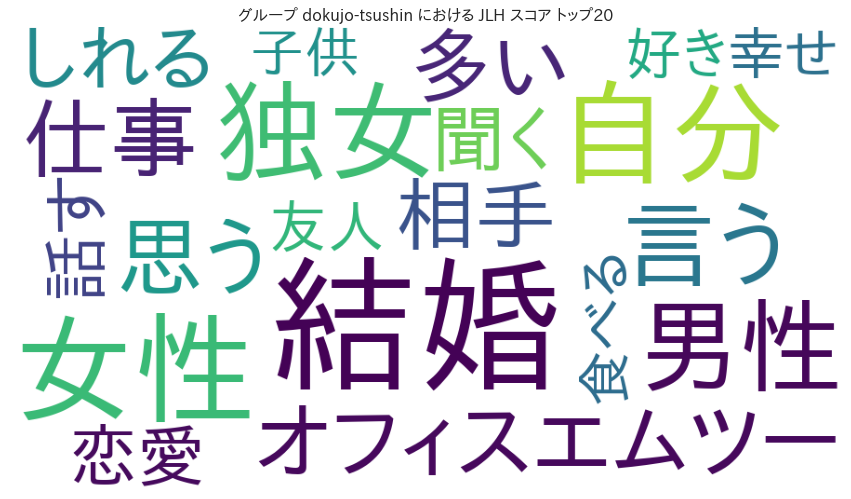

In [ ]:
from wordcloud import WordCloud
def plot_wordcloud(vocab, jlh_indices_topk, jlh_score_topk, group):
  reverse_vocab = {vocab[k]:k for k in vocab.keys() }
  words_topk = [soften(reverse_vocab[i]) for i in jlh_indices_topk]

  word_freq = {}
  for i, word in enumerate(words_topk):
    word_freq[word] = jlh_score_topk[i]

  fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'
  fp = FontProperties(fname=fpath, size=16)
  wordcloud = WordCloud(background_color="white",font_path=fpath, width=900, height=500)
  image = wordcloud.generate_from_frequencies(word_freq)
  plt.figure(figsize=(15,12))
  plt.imshow(image)
  plt.axis("off")
  plt.title("グループ %s における JLH スコア トップ20" % group, fontproperties=fp)
  plt.show()

TOP_K_JLH = 20
jlh_indices_topk = np.argsort(jlh)[::-1][:TOP_K_JLH]
jlh_topk = np.take(jlh, jlh_indices_topk)
plot_wordcloud(vocab, jlh_indices_topk, jlh_topk, group)


## 8. Scaled F-Score

In [ ]:
import pandas as pd
import scattertext as st
ldcc_df = pd.DataFrame([[example[0], example[1]] for example in zip(labels,docs) 
    if example[0] in ["dokujo-tsushin", "sports-watch"]])
ldcc_df.columns = ["group", "text"]


In [ ]:
print(ldcc_df.head(3))
#            group                                               text
#0  dokujo-tsushin  (新しい, コミュニケーション, の, ひと, つ, の, 形, と, し, て, 、, 今...
#1  dokujo-tsushin  (昨年, 12, 月, の, 時点, で, 、, 日本, に, おけ, る, SNS, の,...
#2  dokujo-tsushin  (人, は, 色々, な, 瞬間, に, 絶望, を, 感じる, 。, 仕事, で, 失敗,...


          group                                               text
0  sports-watch  (テレビ朝日, 「報道ステーション」（31日放送, ）, で, は, 、, サウサンプトンF...
1  sports-watch  (今, や, 国民的アスリート, と, なっ, た, サッカー女子日本代表・澤穂希, 。, ...
2  sports-watch  (日本テレビ, 「メレンゲ, の, 気持ち, 」, 27日放送分, に, は, 、, スピー...


In [ ]:
from collections import Counter
from itertools import chain

class PosFilteredUnigramFeatsFromSpacyDoc(object):
    def __init__(self,
                 use_lemmas=False,
                 strip_final_period=False,
               poses_to_include = ['PROPN', 'NOUN', 'VERB', 'ADJ', 'ADV']):
        self._use_lemmas = use_lemmas
        self._strip_final_period = strip_final_period
        self._poses_to_include = poses_to_include

    def _post_process_term(self, term):
        if self._strip_final_period and (term.strip().endswith('.') or term.strip().endswith(',')):
            term = term.strip()[:-1]
        return term

    def get_doc_metadata(self, doc):
        return Counter()

    def get_feats(self, doc):
        ngram_counter = Counter()
        for sent in doc.sents:
            unigrams = self._get_unigram_feats(sent)
            ngram_counter += Counter(chain(unigrams, []))
        return ngram_counter

    def _get_unigram_feats(self, sent):
        unigrams = []
        for tok in sent:
            if tok.pos_ in self._poses_to_include:
                if self._use_lemmas and tok.lemma_.strip():
                    unigrams.append(self._post_process_term(soften(tok.lemma_.strip())))
                elif tok.lower_.strip():
                    unigrams.append(self._post_process_term(tok.lower_.strip()))
        return unigrams

    def has_metadata_term_list(self):
        return False

    def get_top_model_term_lists(self):
        raise Exception("No topic models associated with these features.")


In [ ]:
import scattertext as st
from scattertext.features import FeatsFromSpacyDoc
feats_from_spacy_doc=PosFilteredUnigramFeatsFromSpacyDoc(use_lemmas=True)
#feats_from_spacy_doc=FeatsFromSpacyDoc() # こちらは scattertext のデフォルト実装
corpus = st.CorpusFromParsedDocuments(ldcc_df, category_col="group", parsed_col="text", 
                                      feats_from_spacy_doc=feats_from_spacy_doc).build()


In [ ]:
html = st.produce_scattertext_explorer(corpus, category='sports-watch',
          category_name='スポーツウォッチ', not_category_name='独女通信',
          width_in_pixels=1000, minimum_term_frequency=50, max_terms=4000)


In [ ]:
from IPython.display import HTML
HTML(html)


Output hidden; open in https://colab.research.google.com to view.

## 9. 単語共起ネットワーク

In [ ]:
tokens = []
labels_sent = []
for i, doc in enumerate(docs):
    for sent in doc.sents:
        tokens_of_sent = [token.lemma_ for token in sent if token.pos_ in POS or len(POS) ==0]
        if len(tokens_of_sent) < 2:
            continue
        tokens.append(" ".join(tokens_of_sent))
        labels_sent.append(labels[i])
labels_sent = np.array(labels_sent)


In [ ]:
def calc_cooccurrence(bow):
    length = bow.shape[0]
    clear_diag = np.ones(length, dtype=np.int) - np.eye(length, dtype=np.int)
    array = np.minimum.outer(bow, bow) * clear_diag
    return (array > 0).astype(int)


In [ ]:
group = "movie-enter"
indices = np.where(labels_sent == group)[0]
tokens_group = np.take(tokens, indices, axis=0)
cv_group = CountVectorizer(stop_words=stop_words, ngram_range=(1,NGRAM), min_df=len(indices) // 100, max_features=NUM_VOCAB) 
X_bow_group = cv_group.fit_transform(tokens_group).toarray()
vocab_group  = cv_group.vocabulary_ 
vocab_size = X_bow_group.shape[1]
intersection = np.zeros([vocab_size, vocab_size]).astype(int)
for bow in X_bow_group:
    intersection += calc_cooccurrence(bow)
sum_occurrences = np.sum((X_bow_group > 0).astype(int), axis=0)
union = np.add.outer(sum_occurrences, sum_occurrences) - intersection
union[np.where(union==0)[0]] = 1 # to avoid division by zero.
jaccards = intersection / union


In [ ]:
import networkx as nx
from itertools import combinations
def create_graph(scores, vocab, topk=50):
    vocab = {soften(word):id for word,id in vocab.items()}
    G = nx.Graph()
    G.add_nodes_from([w for w in vocab.keys()])

    flatten_scores = scores.reshape([-1])
    # "*2" は scores は同じ値が対角線両側の二回ずつ入る為
    thresh = np.sort(flatten_scores)[::-1][topk*2] 

    reverse_vocab = {vocab[k]:k for k in vocab.keys() }

    # Top K 以上の score(Jaccard係数) の単語ペアにエッジを張る
    for (i,j) in combinations(range(scores.shape[0]), 2):
        weight = scores[i][j]
        if weight > thresh:
            G.add_edge(reverse_vocab[i], reverse_vocab[j], weight=weight)

    # エッジが張られていない頂点を削除
    isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
    for n in isolated:
       G.remove_node(n)
    return G


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
%matplotlib inline

def plot_network(group, G, k=None, iterations=50, fontsize=12, node_size_factor=30000, edge_width_factor=20):
    fp = FontProperties(fname='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf', size=fontsize)
    plt.figure(figsize=(12, 8))

    layout = nx.spring_layout(G, k=k, iterations=iterations)  

    pr = nx.pagerank(G)
    pr_values = np.array([pr[node] for node in G.nodes()])

    connecteds = []
    colors = []
    for i, c in enumerate(nx.connected_components(G)):
      connecteds.append(c)
      colors.append(1/18 * i)

    node_colors = []
    for node in G.nodes():
      for i, c in enumerate(connecteds):
        if node in c:
          node_colors.append(colors[i])
          break

    nx.draw_networkx_nodes(G, layout, node_color=node_colors, cmap=plt.cm.get_cmap('Set3'), 
        alpha=0.7, node_size=pr_values * node_size_factor)

    labels = nx.draw_networkx_labels(G, layout)
    for t in labels.values():
        t.set_fontproperties(fp)

    edge_width = [d["weight"] * edge_width_factor for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, layout, alpha=0.4, edge_color="darkgrey", width=edge_width)
    plt.title("グループ %s における単語共起ネットワーク" % group, fontproperties=fp)
    plt.axis('off')


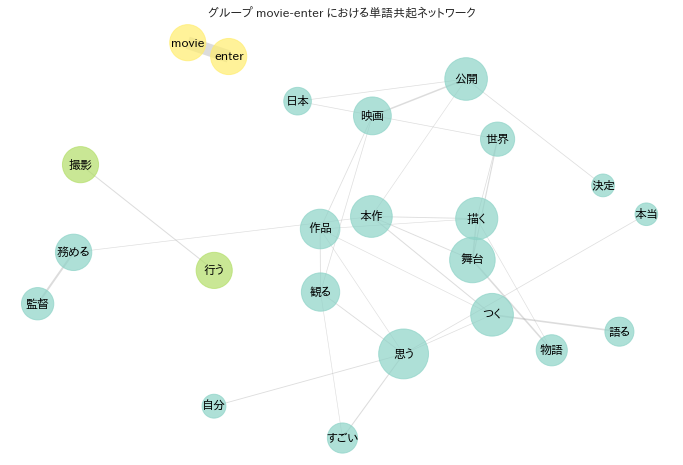

In [ ]:
import math
G = create_graph(jaccards, vocab_group, topk=30)
k = 2.0/math.sqrt(len(G.nodes()))
plot_network(group, G, k=k, iterations=65)


## 10. クラスタリング


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tokens = []
for doc in docs:
    tokens.append(" ".join([token.lemma_ for token in doc if token.pos_ in POS or len(POS) ==0]))
cv = CountVectorizer(stop_words=stop_words, ngram_range=(1,NGRAM), max_df=MAX_DF, min_df=MIN_DF, max_features=NUM_VOCAB)
X_bow = cv.fit_transform(tokens).toarray()
vocab  = cv.vocabulary_ 
X_tfidf = TfidfTransformer().fit_transform(X_bow).toarray()
print("Shape of X_tfidf : %s" % (X_tfidf.shape,))
# Shape of X_tfidf : (7376, 766)


Shape of X_tfidf : (7376, 546)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0).fit(X_tfidf)


In [ ]:
cluster_labels = kmeans.labels_
print("Shape of cluster_labels : %s" % (cluster_labels.shape,))
# Shape of cluster_labels : (7376,)


Shape of cluster_labels : (7376,)


In [ ]:
print("SSE = %.2f" % (kmeans.inertia_))
# SSE = 6136.37


SSE = 6295.83


shape of coords : (7376, 2)


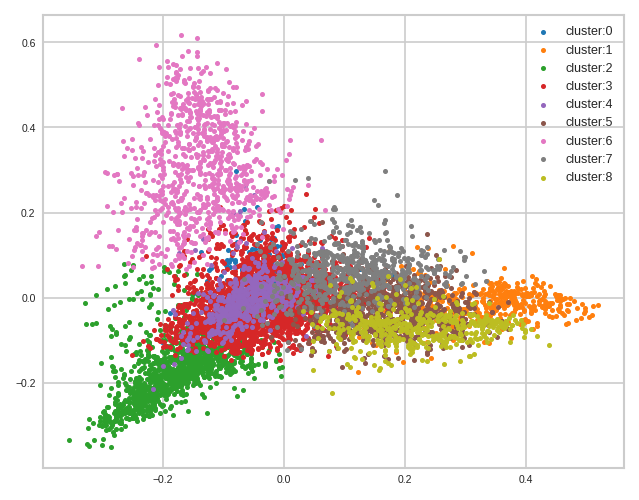

shape of coords : (7376, 2)


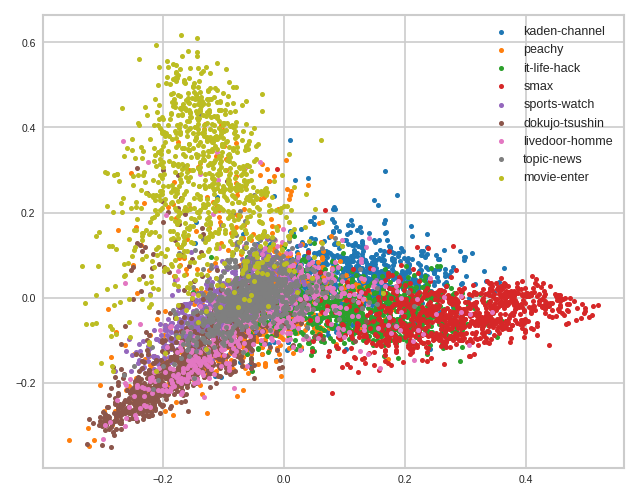

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def draw_scatter_plot(vectors, cluster_labels, label_names=None, 
                      with_index=False, xlim=None, ylim=None, title = "", aspect=(5,4), dpi=150, marker_size=2):
    fp = FontProperties(fname='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf', size=8)
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vectors)
    print("shape of coords : %s" % (coords.shape,))
    fig, ax = plt.subplots(figsize=aspect, dpi=dpi)
    for c in np.unique(cluster_labels):
        indices = np.where(cluster_labels == c)[0]
        coords_c = np.take(coords, indices, axis=0)
        if label_names :
          label = label_names[c]
        else:
          label = "cluster:%d" % c     
        ax.scatter(coords_c[:, 0], coords_c[:, 1], s=marker_size, label=label) 
    ax.legend(loc='upper right', fontsize=6)
    plt.title(title, fontproperties=fp)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.tick_params(axis='y', which='major', labelsize=5)    
    plt.tick_params(axis='x', which='major', labelsize=5)
    plt.show()

draw_scatter_plot(X_tfidf, cluster_labels)  # クラスタリング結果のプロット

group_labels = [groups.index(label) for label in labels]
draw_scatter_plot(X_tfidf, group_labels, groups)  # 元々のグループ分けのプロット

## 11. トピック分析


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tokens = []
for doc in docs:
    tokens.append(" ".join([token.lemma_ for token in doc if token.pos_ in POS or len(POS) ==0]))
tv = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,NGRAM), max_df=MAX_DF, min_df=MIN_DF, max_features=NUM_VOCAB)
X_tfidf = tv.fit_transform(tokens)
vocab = tv.vocabulary_
reverse_vocab = { vocab[k]:k for k in vocab.keys() }
vocab_size = len(vocab)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda = LDA(n_components=5, max_iter=30, n_jobs=-1, verbose=1, evaluate_every=1)
lda.fit(X_tfidf) 

# iteration: 1 of max_iter: 30, perplexity: 1098.6809
# iteration: 2 of max_iter: 30, perplexity: 931.0230
# ...
# iteration: 20 of max_iter: 30, perplexity: 841.1229
# iteration: 21 of max_iter: 30, perplexity: 840.9431
# iteration: 22 of max_iter: 30, perplexity: 840.8543
# LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
#                          evaluate_every=1, learning_decay=0.7,
#                          learning_method='batch', learning_offset=10.0,
#                          max_doc_update_iter=100, max_iter=30,
#                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
#                          perp_tol=0.1, random_state=None,
#                          topic_word_prior=None, total_samples=1000000.0,
#                          verbose=1)


iteration: 1 of max_iter: 30, perplexity: 888.0911
iteration: 2 of max_iter: 30, perplexity: 741.0699
iteration: 3 of max_iter: 30, perplexity: 703.6412
iteration: 4 of max_iter: 30, perplexity: 694.1292
iteration: 5 of max_iter: 30, perplexity: 690.9738
iteration: 6 of max_iter: 30, perplexity: 688.9150
iteration: 7 of max_iter: 30, perplexity: 687.4183
iteration: 8 of max_iter: 30, perplexity: 686.1012
iteration: 9 of max_iter: 30, perplexity: 685.0912
iteration: 10 of max_iter: 30, perplexity: 684.0354
iteration: 11 of max_iter: 30, perplexity: 683.0209
iteration: 12 of max_iter: 30, perplexity: 682.2145
iteration: 13 of max_iter: 30, perplexity: 681.4835
iteration: 14 of max_iter: 30, perplexity: 680.8741
iteration: 15 of max_iter: 30, perplexity: 680.3820
iteration: 16 of max_iter: 30, perplexity: 679.9494
iteration: 17 of max_iter: 30, perplexity: 679.5084
iteration: 18 of max_iter: 30, perplexity: 679.1320
iteration: 19 of max_iter: 30, perplexity: 678.7941
iteration: 20 of max_

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=30,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=1)

In [ ]:
def calc_cooccurrence(bow):
    length = bow.shape[0]
    clear_diag = np.ones(length, dtype=np.int) - np.eye(length, dtype=np.int)
    array = np.minimum.outer(bow, bow) * clear_diag
    return (array > 0).astype(int)

import math
def calc_umass_coherence(v_t, d_vl, d_vm_vl, as_mean=False):
    sum_of_word_pairs = 0.0
    num_of_word_pair = 0
    for m in range(1, len(v_t)):
        for l in range(m):
            sum_of_word_pairs += math.log((d_vm_vl[v_t[m]][v_t[l]] + 1.0) / d_vl[v_t[l]])
            num_of_word_pair +=1
    if as_mean:
      return sum_of_word_pairs / num_of_word_pair
    else:
      return sum_of_word_pairs


In [ ]:
n_components = 5
X = X_tfidf.toarray()
d_vm_vl = np.zeros([vocab_size, vocab_size]).astype(int)
for bow in X:
  d_vm_vl += calc_cooccurrence(bow)
d_vl = np.sum((X > 0).astype(int), axis=0)
sum_coherences = 0.0
for i, component in enumerate(lda.components_):
  top_k_indices = component.argsort()[::-1][:10]
  sum_coherences += calc_umass_coherence(top_k_indices, d_vl=d_vl, d_vm_vl=d_vm_vl)
u_mass = sum_coherences / n_components
u_mass
# -46.755651246363875


-65.24324767667247

In [ ]:
top_k_words = []
for i, component in enumerate(lda.components_):
    top_k_indices = component.argsort()[::-1][:10]
    top_k_word = {soften(reverse_vocab[k]): component[k] for k in top_k_indices}
    top_k_words.append(top_k_word)


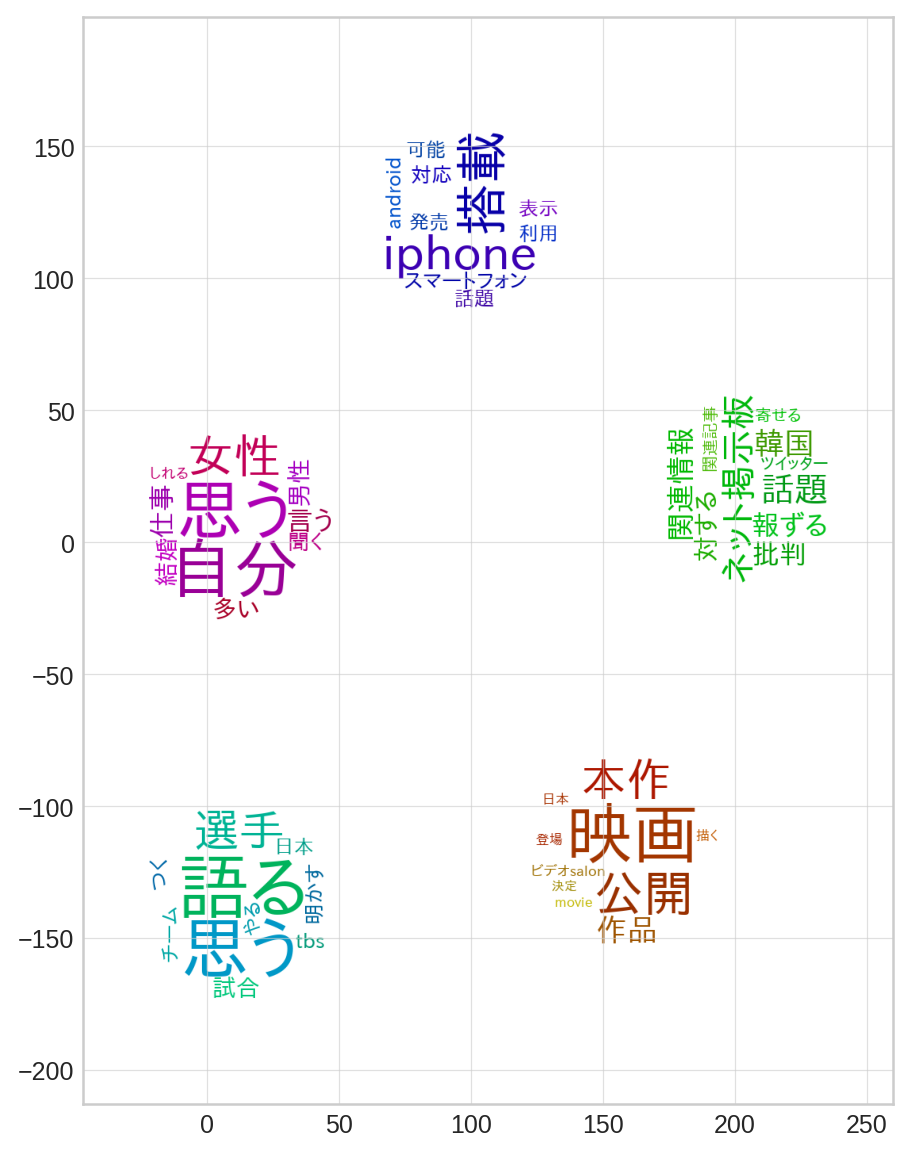

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import random
from functools import partial

def topic_cloud(word_freqs, hue_index, size=300):  

  def circle(size=300):
    d = size
    r = size // 2
    m = r * 0.86
    x, y = np.ogrid[:d, :d]
    mask = (x - r) ** 2 + (y - r) ** 2 > m ** 2
    return 255 * mask.astype(int)

  def random_color_func(word, font_size, position, orientation, 
                        random_state=None, num_topics=9, hue_index=0, **kwargs):
    fluc = 30
    hue = 360 // num_topics * (hue_index) + fluc
    return "hsl(%d, 100%%, %d%%)" % (hue + random.randint(-fluc, fluc), random.randint(30, 40))

  fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'
  fp = FontProperties(fname=fpath, size=16)
  wordcloud = WordCloud(background_color="white",font_path=fpath, mask=circle(size))
  wc = wordcloud.generate_from_frequencies(word_freqs[hue_index])
  color_func = partial(random_color_func, num_topics=len(word_freqs)  ,hue_index=hue_index)
  return wc.recolor(color_func=color_func)

def draw_lda_cloud(components, top_k_words, aspect=(10,8), dpi=180, cloud_size_pct=0.2):

  def draw_topic_cloud(x, y, top_k_words, index, size=100):
    tc = topic_cloud(top_k_words, hue_index=index, size=300)
    r = size//2
    plt.imshow(tc, extent=(x - r, x + r, y -r, y + r))

  tsne = TSNE(n_components=2)
  X_2d = tsne.fit_transform(components)

  xmin = X_2d[:,0].min()
  xmax = X_2d[:,0].max()
  ymin = X_2d[:,1].min()
  ymax = X_2d[:,1].max()
  xmargine  = (xmax - xmin) * 0.3
  ymargine = (ymax - ymin) * 0.3
  cloud_size = ((xmax - xmin) + (ymax - ymin)) / 2 * cloud_size_pct

  fig, ax = plt.subplots(figsize=aspect, dpi=dpi)

  for i in range(len(X_2d)):
    #ax.scatter(X_2d[i][0], X_2d[i][1], s=4, label=i) 
    draw_topic_cloud(X_2d[i][0], X_2d[i][1], top_k_words, i, size=cloud_size)

  plt.xlim((int(xmin - xmargine), int(xmax + xmargine)))
  plt.ylim((int(ymin - ymargine), int(ymax + ymargine)))
  #plt.axis("off")
  plt.tick_params(grid_alpha=0.6, grid_linewidth=0.5)
  plt.show()

draw_lda_cloud(lda.components_, top_k_words, cloud_size_pct=0.4)


In [ ]:
!pip install pyLDAvis


     |████████████████████████████████| 1.7MB 10.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 32.3MB/s 
     |████████████████████████████████| 15.3MB 250kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136897 sha256=b935d5b5c726f1b5871d4b329f0fd7e49adba1e27dd23f585cea9be0f9152eee
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, X_tfidf, tv, mds='tsne')
panel


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  28.417434
3       51.163364 -159.968018       2        1  28.288852
0      -73.144554   21.523815       3        1  18.626996
1      -66.410133 -110.606438       4        1  12.658994
2       54.417324   12.443444       5        1  12.007723, topic_info=       Term        Freq       Total Category  logprob  loglift
348      映画  235.000000  235.000000  Default  30.0000  30.0000
137  ネット掲示板  146.000000  146.000000  Default  29.0000  29.0000
486      話題  305.000000  305.000000  Default  28.0000  28.0000
364      本作  119.000000  119.000000  Default  27.0000  27.0000
537      韓国  120.000000  120.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
215      出る   36.603062  141.824855   Topic5  -4.7857   0.7652
108    コメント   32.547707  107.293231   Topic5  -4.9032   0.9268
455      自分   43.087221  266.461980   Topic5  -4.6226   0.2976
204      入る   33.450314  129.685772   Topic5  -4.8758   0.7646
282     対する   31.248395  166.810228   Topic5  -4.9439   0.4447

[258 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         2  0.993093  android
4         2  0.987699       ck
7         3  0.980379    enter
9         2  0.986114       fi
10        2  0.942538   google
...     ...       ...      ...
541       5  0.061677      食べる
542       1  0.808427       飲む
542       3  0.057745       飲む
542       4  0.076993       飲む
542       5  0.057745       飲む

[709 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 2, 3])

## 12. 類義語の自動抽出


In [ ]:
with open("ldcc_wakati.txt", "w") as f:
  for doc in docs:
    tokens = [token.text for token in doc]
    tokens.append("\n")
    f.write(" ".join(tokens))


In [ ]:
!pip install gensim
!git clone https://github.com/facebookresearch/fastText
!cd fastText && make
!./fastText/fasttext skipgram -input ./ldcc_wakati.txt -output fasttext_ldcc -epoch 10 -dim 100 -minCount 20
# Read 4M words
# Number of words:  11020
# Number of labels: 0
# Progress: 100.0% words/sec/thread:   36471 lr:  0.000000 avg.loss:  2.028130 ETA:   0h 0m 0s


Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 23.27 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c s

In [ ]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load_word2vec_format('./fasttext_ldcc.vec', binary=False) 


/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


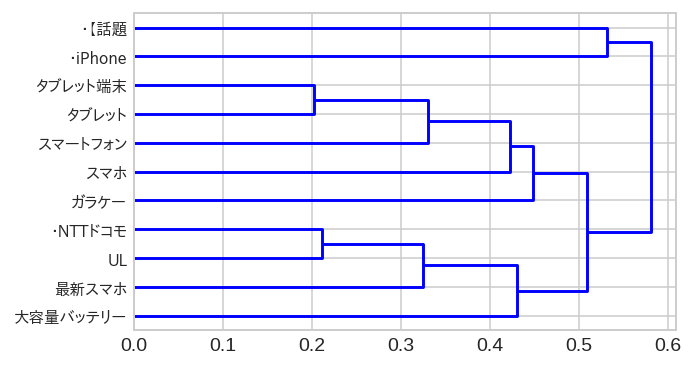

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

def draw_similar_word_dendrogram(wv, word, topn=30, method='average',  metric='cosine'):
    words = [x[0] for x in sorted(wv.most_similar(word, topn=topn))]
    words.append(word)
    vectors = [wv[word] for word in words]
    df = pd.DataFrame(vectors, index=words)
    lm = linkage(pdist(df, metric=metric), method=method)

    f, ax = plt.subplots(figsize=(5,3), dpi=140)
    fp = FontProperties(fname='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf', size=8)
    dendrogram(lm, labels=words, orientation='right', ax=ax, color_threshold=0.0)
    for label in plt.gca().get_yticklabels():
        label.set_fontproperties(fp)

draw_similar_word_dendrogram(wv, "スマホ", 10)
